In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [548]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
Iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [549]:
Iris.shape

(150, 5)

In [550]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris = Iris.iloc[:100]
Iris.shape

(100, 5)

In [0]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
processed_col = Iris['species']=='versicolor'
processed_col = [0 if x==False else 1 for x in processed_col]
Iris['species']=pd.Series(processed_col)

In [552]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


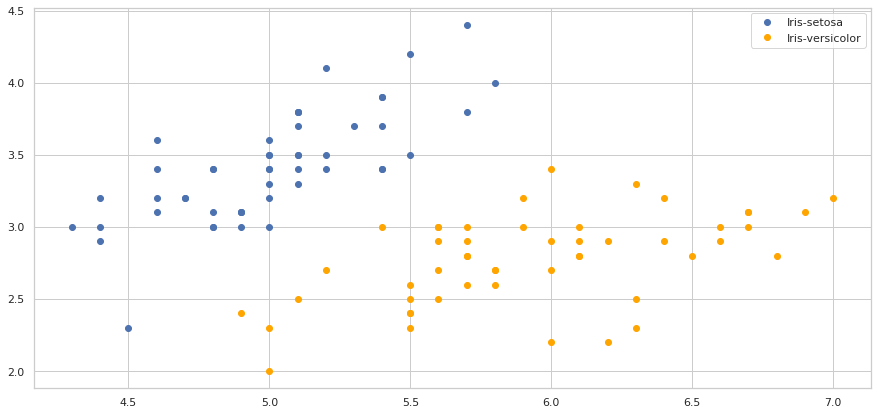

In [553]:
#visualization of given dataset
#codesegment4------------------
figure = plt.figure(figsize=(15,7))
plt.plot(Iris[Iris['species']==0]['sepal_length'],Iris[Iris['species']==0]['sepal_width'],'ob')
plt.plot(Iris[Iris['species']==1]['sepal_length'],Iris[Iris['species']==1]['sepal_width'],'o',color='orange')
plt.legend(['Iris-setosa','Iris-versicolor'])
plt.show()

In [0]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [0]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

#randomnly select 80% of the indices under variable train_index and rest under test_index
total = Iris.shape[0]
eighty = int(0.8 * total)
train_index = np.random.randint(0,total,eighty)
test_index = np.setdiff1d(np.arange(total),train_index)
#test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [0]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [0]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
  max = np.max(data,axis=0)
  min = np.min(data,axis=0)
  range = max-min
  data = data/range
  return data

In [0]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
# line9---------------------------- #weights
W = tf.Variable(tf.zeros(shape=[4,1]))
b = tf.Variable(tf.random.normal(shape=[1, 1])) #bias
#constructor for random initialization

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [0]:
a=tf.placeholder(tf.float32, shape=[None,4])
b=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal(shape=[4,1]))
mult=a*b
init=tf.global_variables_initializer()
#with tf.Session() as sess:
#  sess.run(init)
  #mult_result=sess.run(mult, feed_dict={a:train_X,b:w})
#print(mult_result)

In [0]:
# Declare the 'model' you need to learn
model = tf.matmul(data,W)+b

In [0]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=target))

In [0]:
# Define the learning rate， batch_size and number of iterations.
learning_rate=0.01
batch_size=50 #using batch makes the training ? ->faster
iter_num = 10000

In [0]:
# Define the optimizer with name opt
opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [0]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(model))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [0]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [566]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    batch_index = np.random.randint(0,len(train_X),size=batch_size) #randomnly picks up up 50 sample data from the train_X
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    # recode the results of loss and train accuracy
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    # output
    if (epoch + 1) % 100 == 0:
      print('epoch: {:4d} loss: {:5f} train_acc: {:5f} '.format(epoch + 1, temp_loss,temp_train_acc))
#Write the command to calculate test accuracy:
test_accuracy = sess.run(accuracy, feed_dict={data:train_X,target:np.matrix(train_y).T})
print("The test accuracy is: {:5f}".format(test_accuracy))

epoch:  100 loss: 0.407770 train_acc: 1.000000 
epoch:  200 loss: 0.256592 train_acc: 1.000000 
epoch:  300 loss: 0.184028 train_acc: 1.000000 
epoch:  400 loss: 0.150670 train_acc: 1.000000 
epoch:  500 loss: 0.123470 train_acc: 1.000000 
epoch:  600 loss: 0.094780 train_acc: 1.000000 
epoch:  700 loss: 0.083892 train_acc: 1.000000 
epoch:  800 loss: 0.070488 train_acc: 1.000000 
epoch:  900 loss: 0.067075 train_acc: 1.000000 
epoch: 1000 loss: 0.069697 train_acc: 1.000000 
epoch: 1100 loss: 0.056742 train_acc: 1.000000 
epoch: 1200 loss: 0.049223 train_acc: 1.000000 
epoch: 1300 loss: 0.050290 train_acc: 1.000000 
epoch: 1400 loss: 0.043122 train_acc: 1.000000 
epoch: 1500 loss: 0.039978 train_acc: 1.000000 
epoch: 1600 loss: 0.047192 train_acc: 1.000000 
epoch: 1700 loss: 0.040686 train_acc: 1.000000 
epoch: 1800 loss: 0.032214 train_acc: 1.000000 
epoch: 1900 loss: 0.035702 train_acc: 1.000000 
epoch: 2000 loss: 0.031057 train_acc: 1.000000 
epoch: 2100 loss: 0.027856 train_acc: 1.

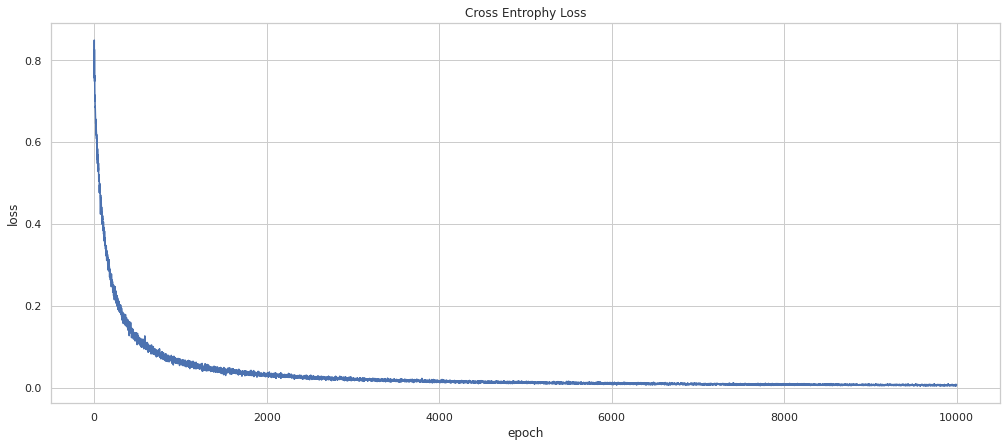

In [567]:
# Visualization of the results
# loss function
plt.figure(figsize=(17,7))
plt.plot(loss_trace)
plt.title('Cross Entrophy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

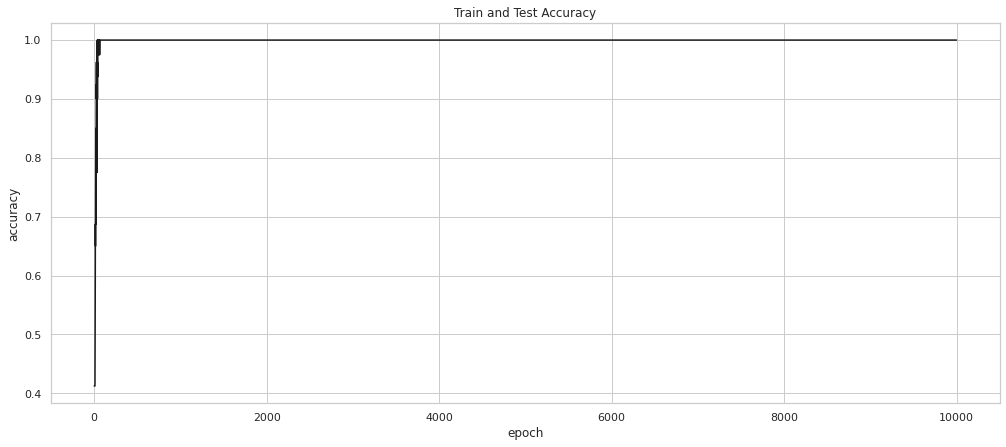

In [568]:
# plot for training accuracy
plt.figure(figsize=(17,7))
plt.plot(train_acc,'k-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.show()